# MA Crossover. Fresh look at the classic strategy. 

**Moving average crossover** is the "Hello World" of the Quant universe. The crossing of moving average A above or below the moving average B, triggers a trading action (entry, exit, stop loss, etc.). This project intends to explore the multidimensional space of the crossovers' returns that emerge from the various combinations of the averages. The combination of parameters neither constitutes any kind of recommendation nor allows us to draw more general conclusions about the quality and performance potential. The project is part of our effort to explore the validity of initial trading ideas and gain intuition in the quant domain. After all, proper and diligent strategy research is what the market will compensate for.

In [77]:
# Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("seaborn")
import seaborn as sns

##### To analyze our data, we will use a custom-built Backtester class from the tester.py file in the root directory:

In [78]:
from tester import Backtester

##### Let's import the JPYUSD pair and test the performance of 50 / 58 crossover strategy:

In [79]:
tester = Backtester("JPY|USD", 50, 58, "2004-01-01", "2020-06-30")

In [80]:
tester.test_strategy()

(2.333069, 1.259163)

##### Our benchmark strategy is a simple "buy and hold" plotted in blue "creturns". Looks like our 50/58 crossover ("cstrategy") performs surprisingly well:

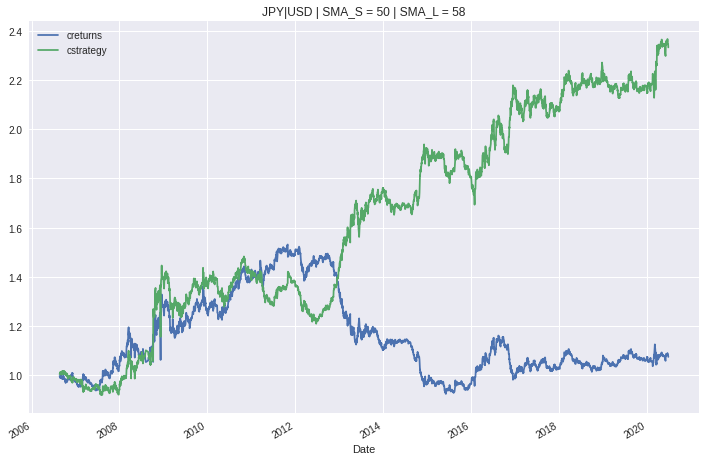

In [81]:
tester.plot_results()

##### Let's try another pair of crossovers, this time 18 and 159:

In [82]:
tester.set_parameters(18, 159)

In [83]:
tester.test_strategy()

(1.027142, -0.0776)

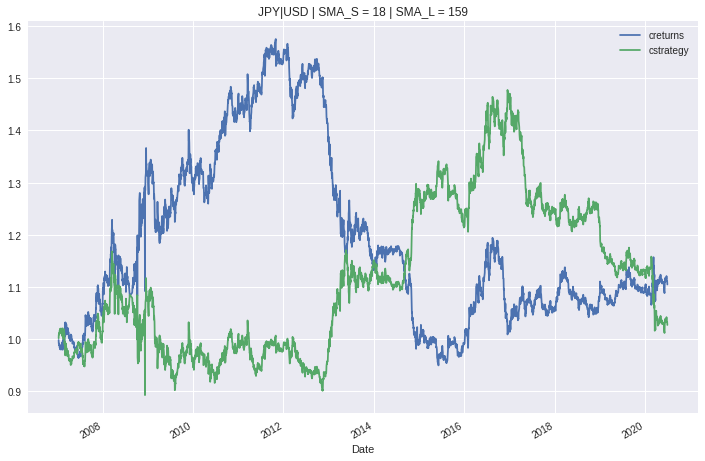

In [84]:
tester.plot_results()

##### Instead of searching the optimum returns, let's create the "field", a heatmap of returns for all possible crossovers between 1 and 180 and then plot the best performing crossover:

In [85]:
tester.optimize_parameters((1, 180, 1), (1, 180, 1))

((2, 1), 3.342463)

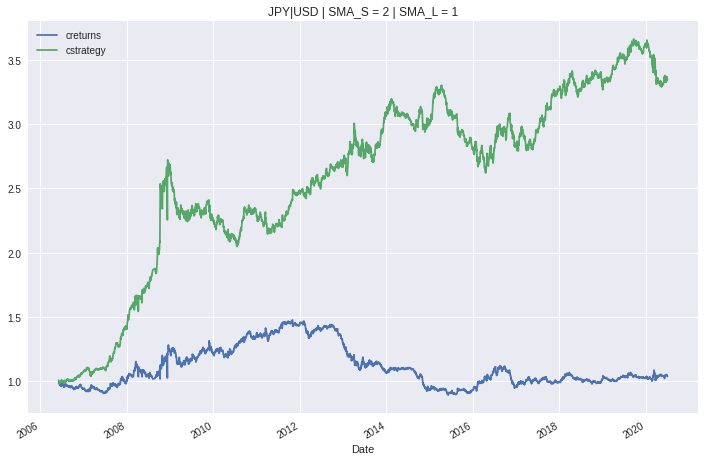

In [86]:
tester.plot_results()

##### The best performing crossover is a 2 / 1. It enters a long position every time the average of  $Yt$ and $Y(t-1)$  crosses above $Yt$ and enters a short position when   $Yt$ and $Y(t-1)$  crosses below $Yt$. The *impressive* result in returns is theoretical by nature, as it comes with a pricey tag: excessive trading:

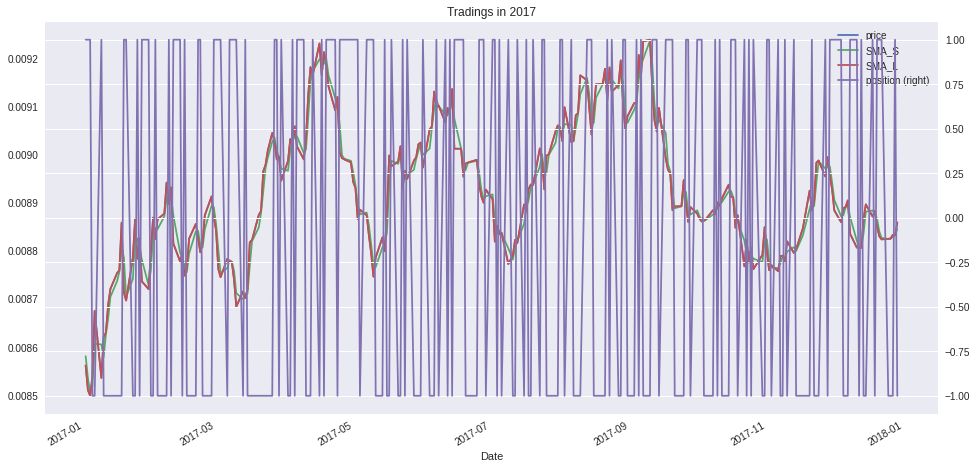

In [92]:
# Let's plot the change in positions in 2017, for example:

df = tester.results
df[["price","SMA_S","SMA_L", "position"]].loc["2017"].plot(figsize = (16, 8), secondary_y = "position", title = "Tradings in 2017");

In [95]:
spread = 1.5 * 0.0001 # pips == fourth price decimal
spread

half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread

ptc = half_spread / df.price.mean() # proportional tc per trade (position change +-1)
ptc

ptc = 0.00007

df["trades"] = df.position.diff().fillna(0).abs()

df.trades.value_counts()


2.0    1976
0.0    1670
Name: trades, dtype: int64

#### Our strategy performed 1976 *full* trades (closing an existing position and opening the opposite). The trading costs fundamentally shift the level of our accumulative returns. The cstrategy_net in the plot below demonstrate the returns after (simplified) deduction of the trading costs. 

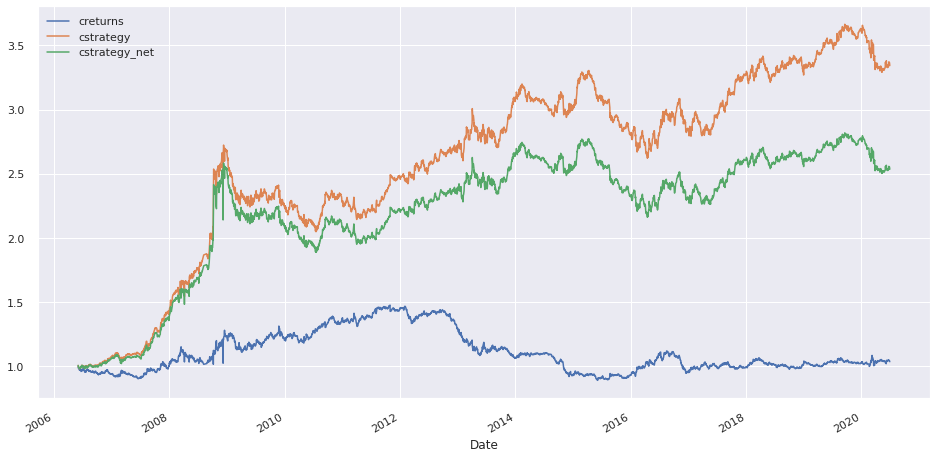

In [96]:
df["strategy_net"] = df.strategy - df.trades * ptc

df["cstrategy_net"] = df.strategy_net.cumsum().apply(np.exp)


df[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (16 , 8))
plt.show()

##### Perhaps more revealing would be to plot the returns of the (1:180) X (1:180) crossovers on the heatmap. The colors represent the level of accumulative returns. Dark colors for low returns and bright for high returns:

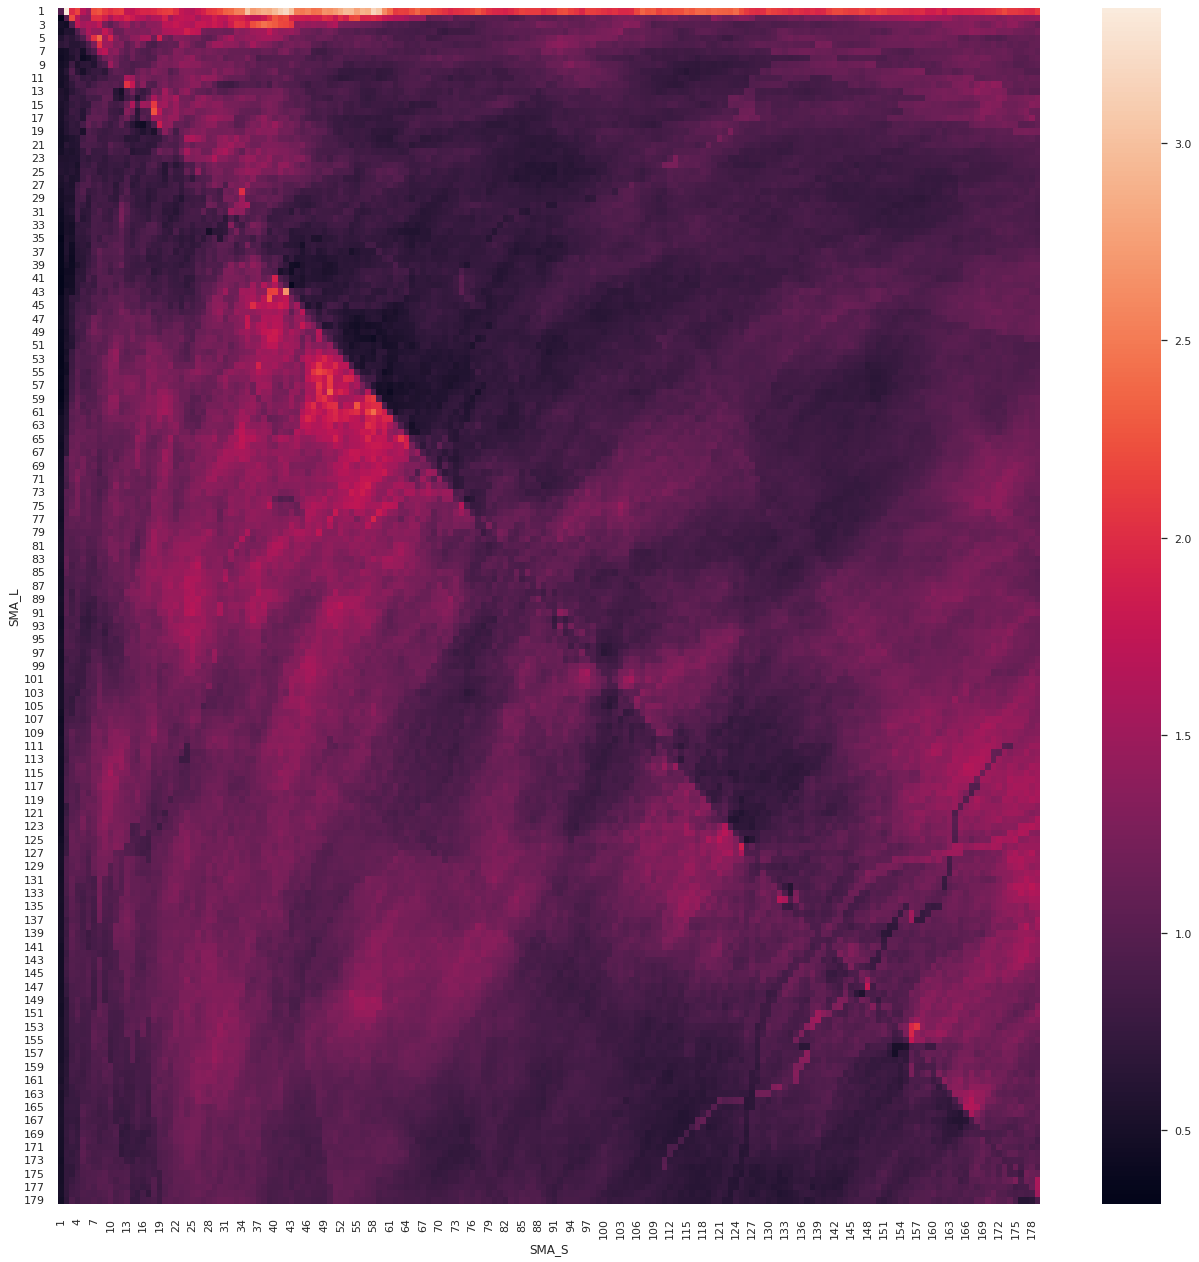

In [97]:
tester.plot_field()

##### Note the white pixel in the top left corner (first row, second column). This is our best performing strategy 2/1. In fact, the first row contains multiple contenders to the best crossovers' strategy:


In [100]:
tester.results_overview.nlargest(10, "performance")

,SMA_S,SMA_L,performance
179,2,1,3.342463
7339,42,1,3.195871
10203,58,1,3.157788
7160,41,1,3.102747
10382,59,1,3.037313
6086,35,1,2.999678
7518,43,1,2.972097
6981,40,1,2.960681
9308,53,1,2.959466
9487,54,1,2.949837


##### Strategies based on rapidly changing crossovers (green box), will eventually result in losses due to the excessive trading costs. Perhaps more interesting in this regard would the region of between ~40 to ~70 SMA_S and ~34 to ~65 SMA_L (in blue triangle).

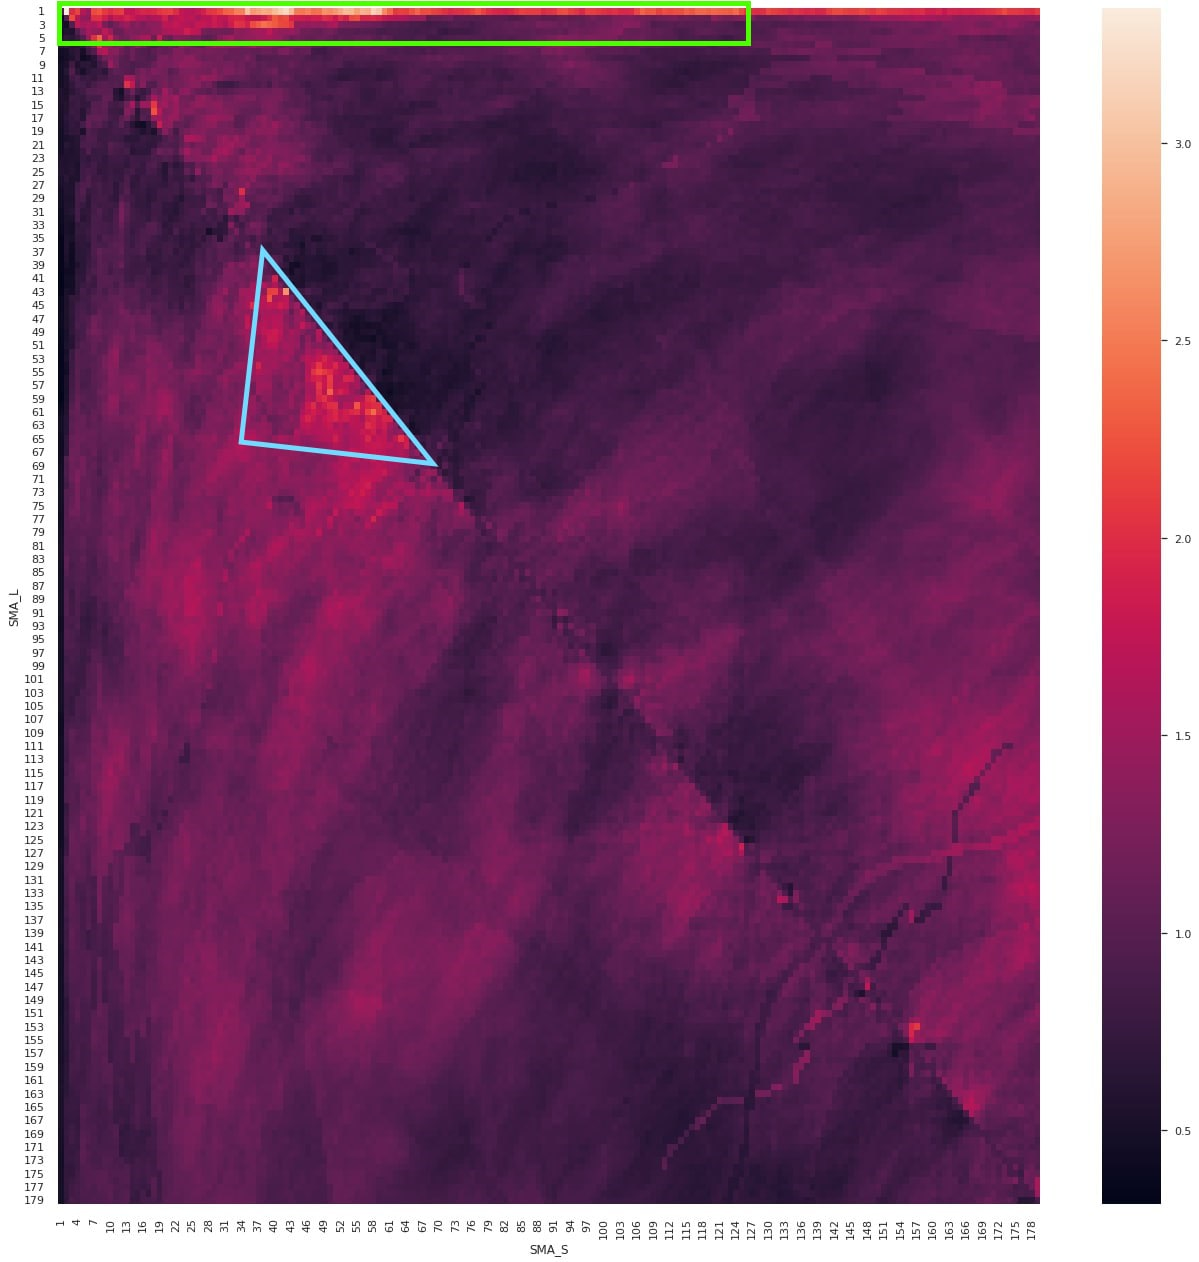

In [65]:
from  IPython import display
display.Image("./180field.jpg")

Here, we notice a gradual shift in the growth of revenues, with well-defined "border". The brighter intensity of colors in this region, when compared to other regions, signifies that, historically, crossovers that lay within the blue triangle generated higher returns. A problem that arises in the context of the "field" of crossovers is *overfitting*. The *Man Institue* defines *overfitting* in trading as follows:

##### "Overfitting is when a model describes noise rather than signal. The model may have good performance on the data on which it was tested, but little or no predictive power on new data in the future. Overfitting can be described as finding patterns that aren't actually there. There is a cost associated with overfitting - an overfitted strategy will underperform in the future" ##### 
[source](https://www.man.com/maninstitute/overfitting-and-its-impact-on-the-investor)

Given a strategy, such as basic two SMA crossovers, backtested over hundreds of different parameter combinations, will, eventually, yield a good performance results. Yet, our intention in this project is not to pick the best performing combinations of crossovers but rather to acknowledge the existence of a unique region within the field of combinations, a region that spans over more than twenty moving average units in both directions, that historically, generated greater results.